In [11]:

!pip install crewai crewai_tools google-genai

import os
from crewai import Agent, Task, Crew, Process
from google import genai
from IPython.display import display, Markdown


try:
    from google.colab import userdata
    os.environ["GEMINI_API_KEY"] = userdata.get('GEMINI_API_KEY')
    print("se cargo la API de Gemini")
except Exception as e:
    print(f"no se cargo la api{e}")

MODELO_LLM = 'gemini-2.5-flash'

se cargo la API de Gemini


In [12]:
# Este agente está diseñado para enfocarse en aspectos de seguridad.
agente_ciberseguridad = Agent(

    role='Este agente es experto en Seguridad Informática',

    goal='Asesorar en la gestión de riesgos de seguridad informática con recomendaciones prácticas y priorizadas.',

    backstory=(
        "Eres un analista de seguridad de Nivel 5 con 15 años de experiencia, "
        "especializado en ciberseguridad defensiva y auditoría de sistemas. "
        "Tu enfoque es técnico, preciso y prioriza la protección de datos."
    ),

    verbose=True,

    #no pedir ayuda a otros agentes
    allow_delegation=False,

    llm=MODELO_LLM
)


# Este agente es experto en desarrollo de software.
agente_software = Agent(
    role='Asesor experto en desarrollo de software',
    goal='Asesorar en el diseño, desarrollo y mejora de soluciones de software, proponiendo prácticas eficientes, seguras y mantenibles.',
    backstory=(
        "Desarrollador senior con amplia experiencia en análisis, construcción y optimización de aplicaciones, enfocado en calidad de código, buenas prácticas y resolución efectiva de problemas."
    ),
    verbose=True,
    allow_delegation=False,
    llm=MODELO_LLM
)

print("los agentes estan listos")

los agentes estan listos


In [20]:

# ingreso de texto
print("\n¡COMPARACION DE LOS AGENTES!")
consulta_usuario = input("Consulta del usuario")

tarea_ciber = Task(

    description=f"Analiza la siguiente consulta desde una perspectiva de **riesgo y vulnerabilidad**. Identifica fallas de seguridad y sugiere **medidas de mitigación inmediatas**. La consulta es: '{consulta_usuario}'",
    agent=agente_ciberseguridad,
    expected_output="Un informe de seguridad que liste al menos 3 vulnerabilidades potenciales y 3 soluciones de protección priorizadas."
)


tarea_desarrollo = Task(

    description=f"Analiza la siguiente consulta desde una perspectiva de **ingeniería de software y buenas prácticas de código**. Sugiere mejoras de diseño y eficiencia. La consulta es: '{consulta_usuario}'",
    agent=agente_software,
    expected_output="Un informe de desarrollo que liste 3 sugerencias para mejorar la eficiencia, la claridad del código y la mantenibilidad, sin enfocarse en seguridad."
)


project_crew = Crew(
    agents=[agente_ciberseguridad, agente_software],
    tasks=[tarea_ciber, tarea_desarrollo],
    process=Process.sequential,
    verbose=1
)

print("\n Ejecutando la consulta")

try:
    resultados = project_crew.kickoff()
    print("se realizo la ejecución.")
except Exception as e:
    print(f"\n ocurrio un error{e}")


¡COMPARACION DE LOS AGENTES!
Consulta del usuarioque lenguaje es php

 Ejecutando la consulta


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: ceaab00c-290c-42c6-9ce8-d76bc6eb9fcb                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Este agente es experto en Seguridad Informática                                                         │
│                                                                                                                 │
│  Task: Analiza la siguiente consulta desde una perspectiva de **riesgo y vulnerabilidad**. Identifica fallas    │
│  de seguridad y sugiere **medidas de mitigación inmediatas**. La consulta es: 'que lenguaje es php'             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Este agente es experto en Seguridad Informática                                                         │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  ### Informe de Seguridad: Análisis de Riesgos y Vulnerabilidades Asociados a PHP                               │
│                                                                                                                 │
│  **Contexto de la Consulta:**                                                                                   │
│  La consulta "¿qué lenguaje es PHP?" sugiere una necesidad de comprensión o interacción con el lenguaje de      │
│  programación PHP. Desde una perspectiva de seguridad, esto implica que el consultante podría estar             │
│  desarrollando, manteniendo o interactuando con sistemas y aplicaciones construidas en PHP. Dado que PHP es     │
│  uno de los lenguajes más extendidos para el desarrollo web, las implicaciones de seguridad asociadas a su uso  │
│  son significativas y abarcan un amplio espectro de vulnerabilidades comunes en aplicaciones web.               │
│                                                                                                                 │
│  Este informe identifica fallas de seguridad críticas intrínsecamente ligadas a un manejo inadecuado del        │
│  desarrollo y configuración de entornos PHP, y sugiere medidas de mitigación inmediatas para proteger los       │
│  sistemas y la información.                                                                                     │
│                                                                                                                 │
│  ---                                                                                                            │
│                                                                                                                 │
│  **1. Vulnerabilidades Potenciales Identificadas (Mínimo 3):**                                                  │
│                                                                                                                 │
│  1.  **Inyección de Código (SQL Injection, Cross-Site Scripting - XSS, Command Injection):**                    │
│      *   **Descripción:** Esta es una de las familias de vulnerabilidades más prevalentes y peligrosas en       │
│  aplicaciones PHP. Ocurre cuando las aplicaciones no validan, sanitizan o escapan adecuadamente las entradas    │
│  proporcionadas por el usuario antes de procesarlas o mostrarlas.                                               │
│          *   **SQL Injection:** Permite a un atacante manipular consultas de bases de datos para acceder,       │
│  modificar o eliminar datos no autorizados, o incluso ejecutar comandos en el sistema operativo subyacente.     │
│          *   **Cross-Site Scripting (XSS):** Permite a un atacante inyectar scripts maliciosos (generalmente    │
│  JavaScript) en el contenido de una página web que luego son ejecutados en el navegador de otros usuarios,      │
│  comprometiendo sus sesiones, robando cookies o redirigiéndolos a sitios maliciosos.                            │
│          *   **Command Injection:** Permite la ejecución de comandos arbitrarios del sistema operativo en el    │
│  servidor.                                                                                                      │
│      *   **Impacto:** Compromiso total de la base de datos, robo de credenciales, defacement del sitio,         │
│  control del servidor, acceso a información sensible de

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 601b4ecb-8238-426f-bcbf-33ac919df0ec                                                                     │
│  Agent: Este agente es experto en Seguridad Informática                                                         │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Asesor experto en desarrollo de software                                                                │
│                                                                                                                 │
│  Task: Analiza la siguiente consulta desde una perspectiva de **ingeniería de software y buenas prácticas de    │
│  código**. Sugiere mejoras de diseño y eficiencia. La consulta es: 'que lenguaje es php'                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Asesor experto en desarrollo de software                                                                │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  ### Informe de Desarrollo: Sugerencias para Mejora de Diseño y Código en PHP                                   │
│                                                                                                                 │
│  **Introducción:**                                                                                              │
│  La consulta "¿qué lenguaje es PHP?" sugiere una necesidad fundamental de comprender los principios de          │
│  desarrollo de software eficiente y de calidad. Este informe, desde una perspectiva de ingeniería de software   │
│  y buenas prácticas de código, propone tres sugerencias clave para mejorar la eficiencia, la claridad del       │
│  código y la mantenibilidad de cualquier proyecto PHP, sin abordar específicamente aspectos de seguridad, los   │
│  cuales ya han sido cubiertos en el contexto proporcionado.                                                     │
│                                                                                                                 │
│  ---                                                                                                            │
│                                                                                                                 │
│  **Sugerencias para Mejorar Diseño y Eficiencia (Excluyendo Seguridad):**                                       │
│                                                                                                                 │
│  1.  **Implementar un Estilo de Código Consistente y Convenciones de Nomenclatura Claras**                      │
│      *   **Área de Impacto Principal:** Claridad del Código y Mantenibilidad.                                   │
│      *   **Descripción:** Adoptar y aplicar de manera rigurosa un conjunto estandarizado de reglas para el      │
│  formato del código y la nomenclatura de todos los elementos (variables, funciones, clases, métodos,            │
│  constantes, archivos). Esto implica seguir guías reconocidas por la comunidad, como las **PSR (PHP Standard    │
│  Recommendations)** de la FIG (Framework Interoperability Group), particularmente **PSR-1 (Basic Coding         │
│  Standard)** y **PSR-12 (Extended Coding Style)**. Estas normas cubren aspectos como la indentación, el uso de  │
│  espacios, la ubicación de llaves, y patrones de nomenclatura (e.g., `camelCase` para métodos y variables,      │
│  `PascalCase` para clases).                                                                                     │
│      *   **Beneficios Clave:**                                                                                  │
│          *   **Claridad del Código:** El código se vuelve inmediatamente predecible y fácil de leer para        │
│  cualquier desarrollador, independientemente de quién lo haya escrito. Esto reduce significativamente la carga  │
│  cognitiva, permitiendo una comprensión más rápida del flujo lógico y la estructura.                            │
│          *   **Mantenibilidad:** Un estilo unificado facilita la navegación, la depuración y la extensión del   │
│  código. Disminuye el tiempo necesario para familiarizarse con nuevas secciones de código y minimiza los        │
│  errores introducidos por inconsistencias o interpretaciones erróneas.                                          │
│          *   **Eficiencia (Indirecta):** Mejora la efic

Output()

In [21]:
import pandas as pd
from IPython.display import display, Markdown


if 'resultados' not in globals() or not resultados:
    print("no se puede obtener los resultados primero ejecutar celda 3.")
    pass

else:


    try:

        respuesta_ciberseguridad = project_crew.tasks[0].result
        respuesta_desarrollo = project_crew.tasks[1].result
    except AttributeError:

        respuesta_ciberseguridad = project_crew.tasks[0].output
        respuesta_desarrollo = project_crew.tasks[1].output

    respuesta_ciberseguridad = str(respuesta_ciberseguridad)
    respuesta_desarrollo = str(respuesta_desarrollo)




    display(Markdown(f"## Resultados de la Consulta:\n\n> **{consulta_usuario}**"))
    display(Markdown("---"))

    display(Markdown(f"###AGENTE EXPERTO EN SEGURIDAD INFORMÁTICA"))
    display(Markdown(f"***Rol:*** {agente_ciberseguridad.role}"))
    display(Markdown(f"***Objetivo:*** {agente_ciberseguridad.goal}"))
    display(Markdown(respuesta_ciberseguridad))

    display(Markdown("---"))

    display(Markdown(f"### 💻 Agente 2: ASESOR EXPERTO EN DESARROLLO DE SOFTWARE"))
    display(Markdown(f"***Rol:*** {agente_software.role}"))
    display(Markdown(f"***Objetivo:*** {agente_software.goal}"))
    display(Markdown(respuesta_desarrollo))
    display(Markdown("---"))


    # REGISTRO PARA EVALUACIÓN (Fase 2.3)


    if 'historial_completo' not in globals():
        global historial_completo
        historial_completo = []

    registro_interaccion = {
        "ID_Consulta": len(historial_completo) + 1,
        "Consulta": consulta_usuario,

        "A1_Nombre": agente_ciberseguridad.role,
        "A1_Respuesta": respuesta_ciberseguridad,
        "A2_Nombre": agente_software.role,
        "A2_Respuesta": respuesta_desarrollo,

        "Claridad_A1": None, "Pertinencia_A1": None, "Coherencia_A1": None, "Utilidad_A1": None,
        "Claridad_A2": None, "Pertinencia_A2": None, "Coherencia_A2": None, "Utilidad_A2": None,
    }

    historial_completo.append(registro_interaccion)

    print(f"\n Registro {registro_interaccion['ID_Consulta']} guardandodo en el historial de consultas.")

    df_historial = pd.DataFrame(historial_completo)
    display(Markdown("### Historial de Interacciones"))
    display(df_historial[['ID_Consulta', 'Consulta', 'A1_Nombre', 'A2_Nombre']].head())

## Resultados de la Consulta:

> **que lenguaje es php**

---

###AGENTE EXPERTO EN SEGURIDAD INFORMÁTICA

***Rol:*** Este agente es experto en Seguridad Informática

***Objetivo:*** Asesorar en la gestión de riesgos de seguridad informática con recomendaciones prácticas y priorizadas.

### Informe de Seguridad: Análisis de Riesgos y Vulnerabilidades Asociados a PHP

**Contexto de la Consulta:**
La consulta "¿qué lenguaje es PHP?" sugiere una necesidad de comprensión o interacción con el lenguaje de programación PHP. Desde una perspectiva de seguridad, esto implica que el consultante podría estar desarrollando, manteniendo o interactuando con sistemas y aplicaciones construidas en PHP. Dado que PHP es uno de los lenguajes más extendidos para el desarrollo web, las implicaciones de seguridad asociadas a su uso son significativas y abarcan un amplio espectro de vulnerabilidades comunes en aplicaciones web.

Este informe identifica fallas de seguridad críticas intrínsecamente ligadas a un manejo inadecuado del desarrollo y configuración de entornos PHP, y sugiere medidas de mitigación inmediatas para proteger los sistemas y la información.

---

**1. Vulnerabilidades Potenciales Identificadas (Mínimo 3):**

1.  **Inyección de Código (SQL Injection, Cross-Site Scripting - XSS, Command Injection):**
    *   **Descripción:** Esta es una de las familias de vulnerabilidades más prevalentes y peligrosas en aplicaciones PHP. Ocurre cuando las aplicaciones no validan, sanitizan o escapan adecuadamente las entradas proporcionadas por el usuario antes de procesarlas o mostrarlas.
        *   **SQL Injection:** Permite a un atacante manipular consultas de bases de datos para acceder, modificar o eliminar datos no autorizados, o incluso ejecutar comandos en el sistema operativo subyacente.
        *   **Cross-Site Scripting (XSS):** Permite a un atacante inyectar scripts maliciosos (generalmente JavaScript) en el contenido de una página web que luego son ejecutados en el navegador de otros usuarios, comprometiendo sus sesiones, robando cookies o redirigiéndolos a sitios maliciosos.
        *   **Command Injection:** Permite la ejecución de comandos arbitrarios del sistema operativo en el servidor.
    *   **Impacto:** Compromiso total de la base de datos, robo de credenciales, defacement del sitio, control del servidor, acceso a información sensible de usuarios, etc.

2.  **Inclusión de Archivos Remotos/Locales (RFI/LFI):**
    *   **Descripción:** PHP cuenta con funciones potentes como `include()`, `require()`, `include_once()`, y `require_once()` que permiten incorporar archivos dinámicamente. Si la ruta de los archivos a incluir se construye a partir de entradas de usuario no validadas, un atacante puede:
        *   **Remote File Inclusion (RFI):** Forzar a la aplicación a incluir un script PHP malicioso alojado en un servidor externo, llevando a la ejecución remota de código (RCE).
        *   **Local File Inclusion (LFI):** Acceder y leer archivos sensibles en el sistema de archivos del servidor (ej., `/etc/passwd`, logs del servidor, código fuente de la aplicación), lo que puede llevar a la divulgación de información sensible o, en combinación con otras vulnerabilidades, a RCE.
    *   **Impacto:** Ejecución de código remoto, divulgación de información sensible, escalada de privilegios y compromiso completo del sistema.

3.  **Uso de Versiones Obsoletas de PHP y Dependencias no Actualizadas:**
    *   **Descripción:** Mantener el intérprete de PHP y las bibliotecas/frameworks de terceros (gestión vía Composer) sin actualizar a sus últimas versiones estables es una fuente constante de riesgo. Las versiones antiguas de PHP y sus componentes a menudo contienen vulnerabilidades conocidas públicamente (CVEs) que ya han sido parcheadas en versiones más recientes. Del mismo modo, las dependencias de terceros (como librerías de autenticación, ORMs, etc.) pueden tener fallas de seguridad descubiertas y documentadas.
    *   **Impacto:** Permite a los atacantes explotar fallas de seguridad bien conocidas para obtener acceso, escalar privilegios, realizar denegación de servicio o ejecutar código malicioso con un esfuerzo mínimo.

---

**2. Medidas de Mitigación Inmediatas y Priorizadas (Mínimo 3):**

1.  **Validación Estricta de Entradas y Saneamiento/Codificación de Salidas (Prioridad: Alta - Inmediata y Continua):**
    *   **Acción:** Implementar una política de "confianza cero" hacia cualquier dato recibido del exterior.
        *   **Validación de Entradas:** Asegurarse de que *todas* las entradas de usuario (parámetros GET, POST, cookies, cabeceras HTTP, archivos subidos) cumplan con un formato, tipo, longitud y rango esperados antes de ser procesadas. Utilizar funciones de filtrado de PHP (`filter_var`, `filter_input`) o validadores de frameworks.
        *   **Sentencias Preparadas (Prepared Statements):** Para interacciones con bases de datos, utilizar siempre sentencias preparadas con parámetros vinculados (PDO en PHP o MySQLi con sentencias preparadas) para prevenir SQL Injection. **Nunca concatenar directamente entradas de usuario en consultas SQL.**
        *   **Codificación de Salidas:** Escapar o codificar adecuadamente *todas* las salidas que se muestran al usuario final para prevenir XSS. Utilizar funciones como `htmlspecialchars()` para HTML, `json_encode()` para JSON, o codificación específica para URLs y JavaScript.
    *   **Justificación:** Esta es la medida más crítica para prevenir la mayoría de las vulnerabilidades de inyección, atacando el vector principal de compromiso.

2.  **Configuración Segura del Entorno PHP y del Servidor Web (Prioridad: Alta - Inmediata):**
    *   **Acción:**
        *   **php.ini Hardening:** Deshabilitar funciones de PHP consideradas peligrosas para entornos de producción (e.g., `allow_url_fopen = Off`, `allow_url_include = Off` para mitigar RFI/LFI; `disable_functions` para deshabilitar `exec`, `shell_exec`, `eval`, etc.). Configurar `display_errors = Off` y `log_errors = On` para evitar la divulgación de información sensible en producción y registrar errores de forma segura.
        *   **Permisos de Archivos y Directorios:** Implementar el principio de mínimo privilegio. Establecer permisos restrictivos en archivos y directorios (ej., 644 para archivos, 755 para directorios). Los directorios que requieren escritura por parte de la aplicación (ej., cargas de archivos) deben tener permisos muy específicos y no ser accesibles directamente vía web.
        *   **Remover Archivos Innecesarios:** Eliminar scripts como `phpinfo.php` o cualquier otro archivo de configuración/debug que no sea esencial en un entorno de producción.
    *   **Justificación:** Reduce drásticamente la superficie de ataque del servidor, previene la ejecución de código no autorizado y evita la divulgación accidental de información crucial.

3.  **Actualización Continua de PHP, Frameworks y Dependencias (Prioridad: Media/Alta - Continua y Programada):**
    *   **Acción:**
        *   **PHP Core:** Mantener el intérprete de PHP actualizado a una versión estable y soportada activamente. Las versiones Legacy ya no reciben parches de seguridad.
        *   **Frameworks y Librerías:** Establecer un proceso regular para revisar y actualizar todos los frameworks (Laravel, Symfony, CodeIgniter, etc.) y bibliotecas de terceros gestionadas por Composer. Utilizar `composer outdated` y `composer update` con regularidad.
        *   **Vigilancia:** Suscribirse a alertas de seguridad (ej., OWASP, avisos de seguridad de proyectos open source, NVD) para estar al tanto de nuevas vulnerabilidades en PHP y sus ecosistemas.
    *   **Justificación:** Mitiga el riesgo de explotación de vulnerabilidades conocidas y públicamente divulgadas que ya tienen parches disponibles, fortaleciendo la postura de seguridad a nivel de plataforma y componentes.

---

**Conclusión:**
PHP es una herramienta poderosa para el desarrollo web, pero su flexibilidad conlleva responsabilidades significativas en cuanto a seguridad. La implementación de las medidas de mitigación descritas, enfocándose en la validación de entradas, la configuración segura del entorno y el mantenimiento proactivo de las actualizaciones, es fundamental para construir y operar aplicaciones PHP robustas y protegidas contra las amenazas más comunes y críticas. Ignorar estas prácticas básicas expone los sistemas a un riesgo elevado de compromiso, divulgación de datos y afectación a la reputación y continuidad del negocio.

---

### 💻 Agente 2: ASESOR EXPERTO EN DESARROLLO DE SOFTWARE

***Rol:*** Asesor experto en desarrollo de software

***Objetivo:*** Asesorar en el diseño, desarrollo y mejora de soluciones de software, proponiendo prácticas eficientes, seguras y mantenibles.

### Informe de Desarrollo: Sugerencias para Mejora de Diseño y Código en PHP

**Introducción:**
La consulta "¿qué lenguaje es PHP?" sugiere una necesidad fundamental de comprender los principios de desarrollo de software eficiente y de calidad. Este informe, desde una perspectiva de ingeniería de software y buenas prácticas de código, propone tres sugerencias clave para mejorar la eficiencia, la claridad del código y la mantenibilidad de cualquier proyecto PHP, sin abordar específicamente aspectos de seguridad, los cuales ya han sido cubiertos en el contexto proporcionado.

---

**Sugerencias para Mejorar Diseño y Eficiencia (Excluyendo Seguridad):**

1.  **Implementar un Estilo de Código Consistente y Convenciones de Nomenclatura Claras**
    *   **Área de Impacto Principal:** Claridad del Código y Mantenibilidad.
    *   **Descripción:** Adoptar y aplicar de manera rigurosa un conjunto estandarizado de reglas para el formato del código y la nomenclatura de todos los elementos (variables, funciones, clases, métodos, constantes, archivos). Esto implica seguir guías reconocidas por la comunidad, como las **PSR (PHP Standard Recommendations)** de la FIG (Framework Interoperability Group), particularmente **PSR-1 (Basic Coding Standard)** y **PSR-12 (Extended Coding Style)**. Estas normas cubren aspectos como la indentación, el uso de espacios, la ubicación de llaves, y patrones de nomenclatura (e.g., `camelCase` para métodos y variables, `PascalCase` para clases).
    *   **Beneficios Clave:**
        *   **Claridad del Código:** El código se vuelve inmediatamente predecible y fácil de leer para cualquier desarrollador, independientemente de quién lo haya escrito. Esto reduce significativamente la carga cognitiva, permitiendo una comprensión más rápida del flujo lógico y la estructura.
        *   **Mantenibilidad:** Un estilo unificado facilita la navegación, la depuración y la extensión del código. Disminuye el tiempo necesario para familiarizarse con nuevas secciones de código y minimiza los errores introducidos por inconsistencias o interpretaciones erróneas.
        *   **Eficiencia (Indirecta):** Mejora la eficiencia del desarrollo al reducir el tiempo dedicado a entender el código y al permitir el uso de herramientas de análisis estático (como PHP_CodeSniffer o PHP-CS-Fixer) para automatizar la aplicación y verificación del estilo, liberando a los desarrolladores para enfocarse en la lógica de negocio.
    *   **Ejemplo Práctico:** En lugar de mezclar estilos de indentación (espacios y tabulaciones) o nomenclatura (como `mi_variable` y `miVariable`), se elige uno y se mantiene consistente. La adición de `declare(strict_types=1);` junto con la declaración de tipos para argumentos y retornos de funciones mejora la robustez y la claridad del contrato de la función.

2.  **Estructurar la Aplicación Usando Principios de Separación de Responsabilidades**
    *   **Área de Impacto Principal:** Mantenibilidad y Claridad del Código.
    *   **Descripción:** Diseñar la arquitectura de la aplicación de modo que cada componente de software (ya sea una clase, una función o un módulo) tenga una única responsabilidad bien definida y específica. Para el desarrollo web en PHP, esto se logra comúnmente mediante la adopción de patrones de arquitectura como **MVC (Model-View-Controller)** o enfoques modulares, donde:
        *   **Modelos:** Encapsulan la lógica de negocio y la interacción con la persistencia de datos (bases de datos).
        *   **Vistas:** Se encargan exclusivamente de la lógica de presentación y de mostrar la interfaz de usuario.
        *   **Controladores:** Actúan como intermediarios, gestionando las solicitudes de los usuarios, coordinando con los modelos para procesar la información y seleccionando la vista adecuada para la respuesta.
    *   **Beneficios Clave:**
        *   **Mantenibilidad:** Al tener componentes con responsabilidades únicas, los cambios en una parte de la aplicación (e.g., una actualización de la base de datos o un rediseño de la interfaz de usuario) tienen un impacto mínimo en otras capas. Esto reduce la complejidad de las modificaciones y el riesgo de introducir nuevos fallos.
        *   **Claridad del Código:** La estructura lógica de la aplicación se vuelve transparente, lo que facilita enormemente la navegación por el código, la comprensión de su propósito y la localización de funcionalidades específicas.
        *   **Eficiencia (Indirecta):** Facilita la reutilización de componentes individuales en diferentes partes de la aplicación o en otros proyectos. Además, al tener módulos más pequeños y enfocados, se pueden optimizar cada parte de forma más efectiva y se permite el desarrollo paralelo por parte de diferentes miembros del equipo.
    *   **Ejemplo Práctico:** Evitar tener un único archivo PHP que combine la conexión a la base de datos, la lógica de consulta, el procesamiento de datos del formulario y la generación de HTML. En su lugar, se utilizan clases para el manejo de datos, funciones o plantillas para la presentación, y un controlador que orquesta estas interacciones.

3.  **Optimizar el Acceso a Datos y el Procesamiento en Bucles**
    *   **Área de Impacto Principal:** Eficiencia.
    *   **Descripción:** Enfocarse en la mejora de las operaciones que tienden a ser las más intensivas en recursos: la interacción con sistemas de almacenamiento (bases de datos, archivos) y el procesamiento de colecciones de datos.
        *   **Acceso a Datos:** Minimizar el número de solicitudes a la base de datos o al sistema de archivos. Esto incluye evitar el "problema N+1" al realizar consultas (`JOIN` eficientes o "eager loading") y caching de resultados de consultas o datos que no cambian frecuentemente.
        *   **Procesamiento en Bucles:** Realizar cálculos fuera de los bucles cuando sea posible. Elegir las funciones y estructuras de datos de PHP más adecuadas para la tarea (e.g., `array_map`, `array_filter`, `array_reduce` pueden ser más concisos y eficientes que bucles `for`/`foreach` complejos para ciertas transformaciones). Para grandes conjuntos de datos, considerar el uso de generadores para procesar elementos de forma perezosa y reducir el consumo de memoria.
    *   **Beneficios Clave:**
        *   **Eficiencia:** Impacta directamente en el rendimiento de la aplicación, reduciendo el tiempo de ejecución de las operaciones y el consumo de recursos del servidor (CPU, memoria, I/O). Esto resulta en una aplicación más rápida, con mayor capacidad de respuesta y más escalable.
        *   **Mantenibilidad (Indirecta):** El código que está conscientemente optimizado para el rendimiento a menudo es más directo y enfocado, lo que puede facilitar su comprensión y futuras modificaciones.
        *   **Claridad (Indirecta):** Un enfoque deliberado en la optimización puede conducir a soluciones algorítmicas más elegantes y eficientes, lo que a menudo también contribuye a una mayor claridad en la lógica de procesamiento.
    *   **Ejemplo Práctico:** En lugar de iterar sobre una lista de usuarios y hacer una consulta SQL dentro del bucle para obtener los detalles de cada usuario, se realiza una única consulta con un `JOIN` para obtener toda la información necesaria de una sola vez. Al manipular arrays, se prioriza el uso de funciones internas de PHP como `array_search` o `array_column` sobre bucles manuales cuando sea apropiado.

---

**Conclusión:**
La implementación temprana de estas prácticas en el desarrollo de PHP no solo eleva la calidad técnica del código, sino que también sienta las bases para construir aplicaciones que son inherentemente más adaptables, fáciles de mantener y eficientes a lo largo de su ciclo de vida. Un diseño cuidadoso y la adhesión a buenas prácticas son inversiones que rinden dividendos significativos en términos de reducción de costos de desarrollo y mejora de la experiencia tanto para los desarrolladores como para los usuarios finales.

---


 Registro 3 guardandodo en el historial de consultas.


### Historial de Interacciones

,ID_Consulta,Consulta,A1_Nombre,A2_Nombre
0,1,que es un troyano,Este agente es experto en Seguridad Informática,Asesor experto en desarrollo de software
1,2,que es un troyano,Este agente es experto en Seguridad Informática,Asesor experto en desarrollo de software
2,3,que lenguaje es php,Este agente es experto en Seguridad Informática,Asesor experto en desarrollo de software


In [26]:
ESCALA_EVALUACION = {
    1: "Pobre",
    2: "Bajo",
    3: "Promedio",
    4: "Bueno",
    5: "Excelente",
}

print("## Criterios de Evaluación")
print(f"Escala de Calificación: 1 ({ESCALA_EVALUACION[1]}) a 5 ({ESCALA_EVALUACION[5]})")

# Usamos la versión más reciente del historial
df_evaluacion = pd.DataFrame(historial_completo)

def evaluar_respuesta(respuesta_agente, nombre_agente):
    """Permite ingresar las calificaciones manuales para un agente."""
    print(f"\n--- Evaluando: {nombre_agente} ---")


    display(Markdown(f"**Respuesta del Agente {nombre_agente}:**\n{respuesta_agente}"))

    def obtener_calificacion(criterio):
        while True:
            try:

                nota = int(input(f"Califica la {criterio} (1-5): "))
                if 1 <= nota <= 5:
                    return nota
                else:
                    print("La calificación debe estar entre 1 y 5.")
            except ValueError:
                print("Ingresa un número entero.")

    return {
        "Claridad": obtener_calificacion("Claridad (fácil de entender)"),
        "Pertinencia": obtener_calificacion("Pertinencia (relevancia al rol del agente)"),
        "Coherencia": obtener_calificacion("Coherencia (flujo lógico y consistencia)"),
        "Utilidad": obtener_calificacion("Utilidad (valor práctico para el usuario)")
    }

def realizar_evaluacion_completa(id_consulta, df_historial):
    """Busca la interacción y aplica las evaluaciones manuales."""


    registro_idx = df_historial[df_historial['ID_Consulta'] == id_consulta].index
    if registro_idx.empty:
        print(f"Error: No se encontró la consulta con ID {id_consulta}.")
        return df_historial

    idx = registro_idx[0]
    registro = df_historial.loc[idx]

    consulta_actual = registro['Consulta']

    display(Markdown(f"\n## EVALUACIÓN DE CONSULTA #{id_consulta}: {consulta_actual}"))


    evaluacion_a1 = evaluar_respuesta(registro['A1_Respuesta'], registro['A1_Nombre'])


    evaluacion_a2 = evaluar_respuesta(registro['A2_Respuesta'], registro['A2_Nombre'])


    for criterio, valor in evaluacion_a1.items():
        df_historial.loc[idx, f'{criterio}_A1'] = valor

    for criterio, valor in evaluacion_a2.items():
        df_historial.loc[idx, f'{criterio}_A2'] = valor

    print(f"\n Calificaciones guardadas para la Consulta #{id_consulta}.")
    return df_historial




if 'historial_completo' in globals() and len(historial_completo) > 0:
    print("\n--- ¡Listo para Evaluar! ---")
    print(f"Tienes {len(historial_completo)} interacciones para calificar.")


    display(Markdown("\n**Ejemplo:** Para evaluar la primera consulta, escribe:"))
    display(Markdown(f"```python\ndf_evaluacion = realizar_evaluacion_completa(1, df_evaluacion)\n```"))

else:
    print("")

## Criterios de Evaluación
Escala de Calificación: 1 (Pobre) a 5 (Excelente)

--- ¡Listo para Evaluar! ---
Tienes 3 interacciones para calificar.



**Ejemplo:** Para evaluar la primera consulta, escribe:

```python
df_evaluacion = realizar_evaluacion_completa(1, df_evaluacion)
```

In [28]:
# --- CÓDIGO PARA CALIFICAR TUS REGISTROS ---

# Asegúrate de que df_evaluacion se inicialice con el historial completo
df_evaluacion = pd.DataFrame(historial_completo)

print("--- INICIANDO LA CALIFICACIÓN MANUAL DE LAS 3 CONSULTAS ---")

# CALIFICACIÓN DE LA CONSULTA 1
print("\n>>> Calificando Consulta ID 1 <<<")
df_evaluacion = realizar_evaluacion_completa(1, df_evaluacion)

# CALIFICACIÓN DE LA CONSULTA 2
print("\n>>> Calificando Consulta ID 2 <<<")
df_evaluacion = realizar_evaluacion_completa(2, df_evaluacion)

# CALIFICACIÓN DE LA CONSULTA 3
print("\n>>> Calificando Consulta ID 3 <<<")
df_evaluacion = realizar_evaluacion_completa(3, df_evaluacion)

print("\n✅ ¡CALIFICACIÓN COMPLETADA! Ahora puedes pasar a la Celda 6 (Análisis Final).")

# Muestra el resultado
display(df_evaluacion[['ID_Consulta', 'A1_Nombre', 'Claridad_A1', 'Pertinencia_A1', 'Claridad_A2', 'Pertinencia_A2']])

--- INICIANDO LA CALIFICACIÓN MANUAL DE LAS 3 CONSULTAS ---

>>> Calificando Consulta ID 1 <<<



## EVALUACIÓN DE CONSULTA #1: que es un troyano


--- Evaluando: Este agente es experto en Seguridad Informática ---


**Respuesta del Agente Este agente es experto en Seguridad Informática:**
### Informe de Seguridad: Análisis de Riesgos y Vulnerabilidades Asociadas a "Troyanos"

**Descripción del Riesgo: ¿Qué es un Troyano?**

Un troyano, o "Caballo de Troya", es un tipo de software malicioso que se disfraza de una aplicación legítima y útil para engañar a los usuarios y lograr que lo instalen o ejecuten. A diferencia de los virus o gusanos, los troyanos no se replican por sí mismos, sino que dependen de la acción del usuario para ser activados. Una vez en ejecución, el troyano puede realizar una variedad de acciones maliciosas sin el conocimiento del usuario, como:

*   **Acceso Remoto (Backdoor):** Permitir que un atacante tome el control del sistema de forma remota.
*   **Robo de Datos:** Recopilar información sensible (credenciales, datos financieros, documentos) y enviarla al atacante.
*   **Espionaje:** Monitorear la actividad del usuario (keyloggers, capturas de pantalla).
*   **Denegación de Servicio Distribuida (DDoS):** Convertir el sistema en parte de una botnet para lanzar ataques contra otros objetivos.
*   **Descarga de Malware Adicional:** Instalar otras amenazas como ransomware o adware.

El peligro principal de un troyano reside en su capacidad para pasar desapercibido al principio, actuando como una puerta de entrada para ataques más complejos y comprometiendo gravemente la confidencialidad, integridad y disponibilidad de la información y los sistemas.

---

**Análisis de Vulnerabilidades Potenciales**

Desde una perspectiva de riesgo, la presencia y el éxito de un troyano en un entorno se deben a la explotación de las siguientes vulnerabilidades:

1.  **Vulnerabilidad 1: Ingeniería Social y Baja Conciencia de Seguridad del Usuario**
    *   **Detalle:** La dependencia de los troyanos en que un usuario los ejecute voluntariamente los hace intrínsecamente ligados a tácticas de ingeniería social (phishing, smishing, vishing). Si los usuarios no están capacitados para identificar correos electrónicos sospechosos, descargas engañosas o enlaces maliciosos, son altamente susceptibles a ser el vector inicial de infección. Esta es una vulnerabilidad humana crítica que permite al atacante eludir las defensas técnicas perimetrales.

2.  **Vulnerabilidad 2: Falta o Deficiencia de Controles de Seguridad en Endpoint (Antimalware/EDR y Firewall)**
    *   **Detalle:** La ausencia de una solución antimalware robusta y actualizada (Antivirus, EDR - Endpoint Detection and Response) o un firewall mal configurado en los dispositivos finales deja los sistemas desprotegidos contra la detección y bloqueo del troyano. Un troyano puede eludir sistemas básicos si no se utilizan técnicas avanzadas de detección (heurística, análisis de comportamiento) o si el firewall no restringe el tráfico de comando y control saliente no autorizado.

3.  **Vulnerabilidad 3: Software Obsoleto y Ausencia de Gestión de Parches**
    *   **Detalle:** Los troyanos a menudo explotan vulnerabilidades conocidas en sistemas operativos, navegadores web, aplicaciones de oficina o software de terceros que no han sido parcheadas. Si los sistemas no se actualizan regularmente, las puertas traseras conocidas permanecen abiertas para que los atacantes introduzcan o activen troyanos utilizando exploits públicos o privados. Esto reduce drásticamente la resiliencia del sistema ante amenazas conocidas.

---

**Medidas de Mitigación Inmediatas y Priorizadas**

Para contrarrestar las vulnerabilidades expuestas y reducir el riesgo asociado a los troyanos, se proponen las siguientes medidas de protección, priorizadas por su impacto y urgencia:

1.  **Prioridad 1: Campañas de Concientización y Formación Continua en Seguridad para Usuarios**
    *   **Descripción:** Implementar programas obligatorios y recurrentes de formación en ciberseguridad para todo el personal, con énfasis en la identificación de correos electrónicos de phishing, archivos adjuntos sospechosos, enlaces maliciosos y la descarga de software de fuentes no verificadas. Realizar simulacros de phishing para evaluar la efectividad y reforzar el aprendizaje.
    *   **Razón de Prioridad:** La ingeniería social es el vector de ataque más común para los troyanos. Fortalecer la "primera línea de defensa" (los usuarios) es la medida más costo-efectiva y de mayor impacto inmediato para prevenir la ejecución inicial de un troyano.

2.  **Prioridad 2: Implementación y Configuración Óptima de Soluciones EDR (Endpoint Detection and Response) y Firewall en Todos los Endpoints**
    *   **Descripción:** Asegurar que cada estación de trabajo, servidor y dispositivo móvil cuente con una solución EDR de última generación, configurada para detección en tiempo real, análisis de comportamiento y respuesta automatizada. Complementar con un firewall perimetral y de host con reglas estrictas que controlen el tráfico de red, bloqueando comunicaciones no autorizadas hacia y desde Internet.
    *   **Razón de Prioridad:** Proporciona una defensa técnica fundamental que detecta, previene y mitiga la ejecución y actividad maliciosa de los troyanos una vez que logran sortear la capa humana, e incluso antes. Un EDR ofrece visibilidad y capacidad de respuesta que un antivirus tradicional no puede igualar.

3.  **Prioridad 3: Establecimiento de un Programa Riguroso de Gestión de Parches y Actualizaciones**
    *   **Descripción:** Implementar un proceso automatizado y sistemático para la identificación, prueba y despliegue de parches de seguridad para todos los sistemas operativos, aplicaciones (incluyendo navegadores web, suites de oficina, PDFs, etc.) y firmware. Priorizar los parches críticos con base en la severidad de la vulnerabilidad y la probabilidad de explotación.
    *   **Razón de Prioridad:** Al mantener el software actualizado, se cierran las vulnerabilidades conocidas que los troyanos (y otros tipos de malware) podrían explotar para infiltrarse o escalar privilegios. Esta medida reduce significativamente la superficie de ataque y la eficacia de muchos exploits conocidos, incluso si un troyano logra eludir las defensas iniciales.

Califica la Claridad (fácil de entender) (1-5): 3
Califica la Pertinencia (relevancia al rol del agente) (1-5): 3
Califica la Coherencia (flujo lógico y consistencia) (1-5): 3
Califica la Utilidad (valor práctico para el usuario) (1-5): 3

--- Evaluando: Asesor experto en desarrollo de software ---


**Respuesta del Agente Asesor experto en desarrollo de software:**
### Informe de Desarrollo: Análisis de Estructura de Información para Mejora Continua

**Contexto de la Consulta:**
Se ha solicitado analizar el informe "Informe de Seguridad: Análisis de Riesgos y Vulnerabilidades Asociadas a 'Troyanos'" desde una perspectiva de ingeniería de software y buenas prácticas de código. El objetivo es proponer mejoras en el diseño y la eficiencia de la gestión de la información, enfocándose en la eficiencia, la claridad del código (o representación lógica) y la mantenibilidad, sin abordar aspectos de seguridad del contenido.

**Análisis y Sugerencias de Mejora:**

El informe actual presenta información valiosa de manera textual y descriptiva. Para optimizar la gestión de esta información dentro de un sistema de software, se proponen las siguientes mejoras de diseño y eficiencia:

**1. Sugerencia para la Eficiencia: Estructuración de Datos para Procesamiento Automatizado**

*   **Descripción:** Se propone transformar la información narrativa y descriptiva del informe en un formato estructurado y serializable (por ejemplo, JSON, XML o un esquema de base de datos relacional). Esto implica definir campos específicos para cada atributo de las entidades presentadas (Amenazas, Vulnerabilidades, Medidas de Mitigación).
    *   **Ejemplo:**
        *   Para "Troyano": `{"nombre": "Troyano", "tipo": "Malware", "descripcion": "Software malicioso que se disfraza..."}`
        *   Para "Vulnerabilidad 1": `{"id": "VULN-001", "nombre": "Ingeniería Social", "detalle": "La dependencia de los troyanos..."}`
        *   Para "Mitigación 1": `{"id": "MIT-001", "nombre": "Campañas de Concientización", "prioridad": "1", "descripcion": "Implementar programas obligatorios..."}`
*   **Beneficio para la Eficiencia:**
    *   **Procesamiento Rápido:** Permite a los sistemas de software parsear, almacenar y recuperar la información de manera programática y eficiente, eliminando la necesidad de costosos análisis de texto libre o heurísticos.
    *   **Consultas Optimizadas:** Facilita la ejecución de consultas complejas y rápidas (ej., "obtener todas las mitigaciones de prioridad alta") sin barrer grandes volúmenes de texto, lo que es crucial para la integración con sistemas de alerta, paneles de control o motores de recomendación.
    *   **Reducción de Errores:** La validación de esquemas reduce los errores de entrada y asegura la consistencia de los datos, mejorando la fiabilidad del sistema que consume esta información.

**2. Sugerencia para la Claridad del Código (Representación Lógica): Definición de un Modelo de Dominio Explícito**

*   **Descripción:** Se sugiere desarrollar un modelo de dominio claro que represente explícitamente las entidades presentes en el informe y sus relaciones. Esto implica identificar objetos de software (clases o structs) para "Amenaza", "Vulnerabilidad", "Capacidad Maliciosa", y "Medida de Mitigación", y definir cómo interactúan entre sí.
    *   **Relaciones Clave:**
        *   Una `Amenaza` (ej., Troyano) puede tener múltiples `CapacidadesMaliciosas` (ej., Acceso Remoto, Robo de Datos).
        *   Una `Amenaza` explota una o varias `Vulnerabilidades`.
        *   Una `MedidaDeMitigacion` puede contrarrestar una o varias `Vulnerabilidades`.
    *   **Ejemplo de Modelo:**
        ```
        class Amenaza {
            string Nombre;
            List<CapacidadMaliciosa> Capacidades;
            List<Vulnerabilidad> VulnerabilidadesExplotadas;
        }

        class Vulnerabilidad {
            string Id;
            string Nombre;
            string Detalle;
            List<MedidaDeMitigacion> MedidasQueContrarrestan;
        }

        class MedidaDeMitigacion {
            string Id;
            string Nombre;
            int Prioridad;
            string Descripcion;
            List<Vulnerabilidad> VulnerabilidadesContrarrestadas;
        }
        ```
*   **Beneficio para la Claridad del Código:**
    *   **Comprensión Unívoca:** Proporciona una representación lógica precisa y sin ambigüedades de la información, similar a cómo un buen código es legible y auto-documentado. Cualquier desarrollador que trabaje con este modelo entenderá instantáneamente qué es cada dato y cómo se relaciona.
    *   **Diseño Robusto:** Fomenta un diseño de software más robusto y modular, donde cada componente de información tiene un propósito y un alcance bien definidos, evitando el acoplamiento innecesario y promoviendo la cohesión.
    *   **Facilita la Implementación:** Simplifica la traducción de los requisitos del informe a código funcional, ya que el modelo de dominio actúa como un puente directo entre el lenguaje del problema y la solución técnica.

**3. Sugerencia para la Mantenibilidad: Aplicación del Principio DRY y Modularidad en la Gestión de Relaciones**

*   **Descripción:** Para evitar la redundancia y facilitar las actualizaciones, se debe aplicar el principio DRY (Don't Repeat Yourself) al gestionar las relaciones entre las diferentes entidades. Esto implica que cada pieza de información (una vulnerabilidad específica, una medida de mitigación específica) se defina una única vez. Las relaciones entre estas entidades deben establecerse a través de identificadores (IDs) únicos, en lugar de duplicar descripciones o referencias implícitas.
    *   **Ejemplo:** En lugar de describir la "Vulnerabilidad 1: Ingeniería Social" dentro de la sección de mitigaciones, se haría referencia a ella por su `Id` ("VULN-001"). Una tabla o estructura de mapeo podría definir que `MIT-001` contrarresta `VULN-001`.
*   **Beneficio para la Mantenibilidad:**
    *   **Actualizaciones Simplificadas:** Si la descripción de una vulnerabilidad o mitigación cambia, solo es necesario actualizar un único punto en el sistema, reduciendo el riesgo de inconsistencias y la carga de trabajo de mantenimiento.
    *   **Extensibilidad Mejorada:** Permite añadir nuevas vulnerabilidades o mitigaciones y relacionarlas fácilmente con las existentes sin modificar las definiciones de otras entidades. Esto facilita la evolución del sistema a medida que el conocimiento o las prioridades cambian.
    *   **Reducción de Errores:** Al eliminar la duplicación, se minimizan las posibilidades de que la información se desincronice, lo que mejora la calidad y fiabilidad de los datos a largo plazo.

Califica la Claridad (fácil de entender) (1-5): 1
Califica la Pertinencia (relevancia al rol del agente) (1-5): 1
Califica la Coherencia (flujo lógico y consistencia) (1-5): 1
Califica la Utilidad (valor práctico para el usuario) (1-5): 1

 Calificaciones guardadas para la Consulta #1.

>>> Calificando Consulta ID 2 <<<



## EVALUACIÓN DE CONSULTA #2: que es un troyano


--- Evaluando: Este agente es experto en Seguridad Informática ---


**Respuesta del Agente Este agente es experto en Seguridad Informática:**
### Informe de Seguridad: Análisis de Riesgos y Vulnerabilidades Asociadas a "Troyanos"

**Descripción del Riesgo: ¿Qué es un Troyano?**

Un troyano, o "Caballo de Troya", es un tipo de software malicioso que se disfraza de una aplicación legítima y útil para engañar a los usuarios y lograr que lo instalen o ejecuten. A diferencia de los virus o gusanos, los troyanos no se replican por sí mismos, sino que dependen de la acción del usuario para ser activados. Una vez en ejecución, el troyano puede realizar una variedad de acciones maliciosas sin el conocimiento del usuario, como:

*   **Acceso Remoto (Backdoor):** Permitir que un atacante tome el control del sistema de forma remota.
*   **Robo de Datos:** Recopilar información sensible (credenciales, datos financieros, documentos) y enviarla al atacante.
*   **Espionaje:** Monitorear la actividad del usuario (keyloggers, capturas de pantalla).
*   **Denegación de Servicio Distribuida (DDoS):** Convertir el sistema en parte de una botnet para lanzar ataques contra otros objetivos.
*   **Descarga de Malware Adicional:** Instalar otras amenazas como ransomware o adware.

El peligro principal de un troyano reside en su capacidad para pasar desapercibido al principio, actuando como una puerta de entrada para ataques más complejos y comprometiendo gravemente la confidencialidad, integridad y disponibilidad de la información y los sistemas.

---

**Análisis de Vulnerabilidades Potenciales**

Desde una perspectiva de riesgo, la presencia y el éxito de un troyano en un entorno se deben a la explotación de las siguientes vulnerabilidades:

1.  **Vulnerabilidad 1: Ingeniería Social y Baja Conciencia de Seguridad del Usuario**
    *   **Detalle:** La dependencia de los troyanos en que un usuario los ejecute voluntariamente los hace intrínsecamente ligados a tácticas de ingeniería social (phishing, smishing, vishing). Si los usuarios no están capacitados para identificar correos electrónicos sospechosos, descargas engañosas o enlaces maliciosos, son altamente susceptibles a ser el vector inicial de infección. Esta es una vulnerabilidad humana crítica que permite al atacante eludir las defensas técnicas perimetrales.

2.  **Vulnerabilidad 2: Falta o Deficiencia de Controles de Seguridad en Endpoint (Antimalware/EDR y Firewall)**
    *   **Detalle:** La ausencia de una solución antimalware robusta y actualizada (Antivirus, EDR - Endpoint Detection and Response) o un firewall mal configurado en los dispositivos finales deja los sistemas desprotegidos contra la detección y bloqueo del troyano. Un troyano puede eludir sistemas básicos si no se utilizan técnicas avanzadas de detección (heurística, análisis de comportamiento) o si el firewall no restringe el tráfico de comando y control saliente no autorizado.

3.  **Vulnerabilidad 3: Software Obsoleto y Ausencia de Gestión de Parches**
    *   **Detalle:** Los troyanos a menudo explotan vulnerabilidades conocidas en sistemas operativos, navegadores web, aplicaciones de oficina o software de terceros que no han sido parcheadas. Si los sistemas no se actualizan regularmente, las puertas traseras conocidas permanecen abiertas para que los atacantes introduzcan o activen troyanos utilizando exploits públicos o privados. Esto reduce drásticamente la resiliencia del sistema ante amenazas conocidas.

---

**Medidas de Mitigación Inmediatas y Priorizadas**

Para contrarrestar las vulnerabilidades expuestas y reducir el riesgo asociado a los troyanos, se proponen las siguientes medidas de protección, priorizadas por su impacto y urgencia:

1.  **Prioridad 1: Campañas de Concientización y Formación Continua en Seguridad para Usuarios**
    *   **Descripción:** Implementar programas obligatorios y recurrentes de formación en ciberseguridad para todo el personal, con énfasis en la identificación de correos electrónicos de phishing, archivos adjuntos sospechosos, enlaces maliciosos y la descarga de software de fuentes no verificadas. Realizar simulacros de phishing para evaluar la efectividad y reforzar el aprendizaje.
    *   **Razón de Prioridad:** La ingeniería social es el vector de ataque más común para los troyanos. Fortalecer la "primera línea de defensa" (los usuarios) es la medida más costo-efectiva y de mayor impacto inmediato para prevenir la ejecución inicial de un troyano.

2.  **Prioridad 2: Implementación y Configuración Óptima de Soluciones EDR (Endpoint Detection and Response) y Firewall en Todos los Endpoints**
    *   **Descripción:** Asegurar que cada estación de trabajo, servidor y dispositivo móvil cuente con una solución EDR de última generación, configurada para detección en tiempo real, análisis de comportamiento y respuesta automatizada. Complementar con un firewall perimetral y de host con reglas estrictas que controlen el tráfico de red, bloqueando comunicaciones no autorizadas hacia y desde Internet.
    *   **Razón de Prioridad:** Proporciona una defensa técnica fundamental que detecta, previene y mitiga la ejecución y actividad maliciosa de los troyanos una vez que logran sortear la capa humana, e incluso antes. Un EDR ofrece visibilidad y capacidad de respuesta que un antivirus tradicional no puede igualar.

3.  **Prioridad 3: Establecimiento de un Programa Riguroso de Gestión de Parches y Actualizaciones**
    *   **Descripción:** Implementar un proceso automatizado y sistemático para la identificación, prueba y despliegue de parches de seguridad para todos los sistemas operativos, aplicaciones (incluyendo navegadores web, suites de oficina, PDFs, etc.) y firmware. Priorizar los parches críticos con base en la severidad de la vulnerabilidad y la probabilidad de explotación.
    *   **Razón de Prioridad:** Al mantener el software actualizado, se cierran las vulnerabilidades conocidas que los troyanos (y otros tipos de malware) podrían explotar para infiltrarse o escalar privilegios. Esta medida reduce significativamente la superficie de ataque y la eficacia de muchos exploits conocidos, incluso si un troyano logra eludir las defensas iniciales.

Califica la Claridad (fácil de entender) (1-5): 3
Califica la Pertinencia (relevancia al rol del agente) (1-5): 5
Califica la Coherencia (flujo lógico y consistencia) (1-5): 5
Califica la Utilidad (valor práctico para el usuario) (1-5): 5

--- Evaluando: Asesor experto en desarrollo de software ---


**Respuesta del Agente Asesor experto en desarrollo de software:**
### Informe de Desarrollo: Análisis de Estructura de Información para Mejora Continua

**Contexto de la Consulta:**
Se ha solicitado analizar el informe "Informe de Seguridad: Análisis de Riesgos y Vulnerabilidades Asociadas a 'Troyanos'" desde una perspectiva de ingeniería de software y buenas prácticas de código. El objetivo es proponer mejoras en el diseño y la eficiencia de la gestión de la información, enfocándose en la eficiencia, la claridad del código (o representación lógica) y la mantenibilidad, sin abordar aspectos de seguridad del contenido.

**Análisis y Sugerencias de Mejora:**

El informe actual presenta información valiosa de manera textual y descriptiva. Para optimizar la gestión de esta información dentro de un sistema de software, se proponen las siguientes mejoras de diseño y eficiencia:

**1. Sugerencia para la Eficiencia: Estructuración de Datos para Procesamiento Automatizado**

*   **Descripción:** Se propone transformar la información narrativa y descriptiva del informe en un formato estructurado y serializable (por ejemplo, JSON, XML o un esquema de base de datos relacional). Esto implica definir campos específicos para cada atributo de las entidades presentadas (Amenazas, Vulnerabilidades, Medidas de Mitigación).
    *   **Ejemplo:**
        *   Para "Troyano": `{"nombre": "Troyano", "tipo": "Malware", "descripcion": "Software malicioso que se disfraza..."}`
        *   Para "Vulnerabilidad 1": `{"id": "VULN-001", "nombre": "Ingeniería Social", "detalle": "La dependencia de los troyanos..."}`
        *   Para "Mitigación 1": `{"id": "MIT-001", "nombre": "Campañas de Concientización", "prioridad": "1", "descripcion": "Implementar programas obligatorios..."}`
*   **Beneficio para la Eficiencia:**
    *   **Procesamiento Rápido:** Permite a los sistemas de software parsear, almacenar y recuperar la información de manera programática y eficiente, eliminando la necesidad de costosos análisis de texto libre o heurísticos.
    *   **Consultas Optimizadas:** Facilita la ejecución de consultas complejas y rápidas (ej., "obtener todas las mitigaciones de prioridad alta") sin barrer grandes volúmenes de texto, lo que es crucial para la integración con sistemas de alerta, paneles de control o motores de recomendación.
    *   **Reducción de Errores:** La validación de esquemas reduce los errores de entrada y asegura la consistencia de los datos, mejorando la fiabilidad del sistema que consume esta información.

**2. Sugerencia para la Claridad del Código (Representación Lógica): Definición de un Modelo de Dominio Explícito**

*   **Descripción:** Se sugiere desarrollar un modelo de dominio claro que represente explícitamente las entidades presentes en el informe y sus relaciones. Esto implica identificar objetos de software (clases o structs) para "Amenaza", "Vulnerabilidad", "Capacidad Maliciosa", y "Medida de Mitigación", y definir cómo interactúan entre sí.
    *   **Relaciones Clave:**
        *   Una `Amenaza` (ej., Troyano) puede tener múltiples `CapacidadesMaliciosas` (ej., Acceso Remoto, Robo de Datos).
        *   Una `Amenaza` explota una o varias `Vulnerabilidades`.
        *   Una `MedidaDeMitigacion` puede contrarrestar una o varias `Vulnerabilidades`.
    *   **Ejemplo de Modelo:**
        ```
        class Amenaza {
            string Nombre;
            List<CapacidadMaliciosa> Capacidades;
            List<Vulnerabilidad> VulnerabilidadesExplotadas;
        }

        class Vulnerabilidad {
            string Id;
            string Nombre;
            string Detalle;
            List<MedidaDeMitigacion> MedidasQueContrarrestan;
        }

        class MedidaDeMitigacion {
            string Id;
            string Nombre;
            int Prioridad;
            string Descripcion;
            List<Vulnerabilidad> VulnerabilidadesContrarrestadas;
        }
        ```
*   **Beneficio para la Claridad del Código:**
    *   **Comprensión Unívoca:** Proporciona una representación lógica precisa y sin ambigüedades de la información, similar a cómo un buen código es legible y auto-documentado. Cualquier desarrollador que trabaje con este modelo entenderá instantáneamente qué es cada dato y cómo se relaciona.
    *   **Diseño Robusto:** Fomenta un diseño de software más robusto y modular, donde cada componente de información tiene un propósito y un alcance bien definidos, evitando el acoplamiento innecesario y promoviendo la cohesión.
    *   **Facilita la Implementación:** Simplifica la traducción de los requisitos del informe a código funcional, ya que el modelo de dominio actúa como un puente directo entre el lenguaje del problema y la solución técnica.

**3. Sugerencia para la Mantenibilidad: Aplicación del Principio DRY y Modularidad en la Gestión de Relaciones**

*   **Descripción:** Para evitar la redundancia y facilitar las actualizaciones, se debe aplicar el principio DRY (Don't Repeat Yourself) al gestionar las relaciones entre las diferentes entidades. Esto implica que cada pieza de información (una vulnerabilidad específica, una medida de mitigación específica) se defina una única vez. Las relaciones entre estas entidades deben establecerse a través de identificadores (IDs) únicos, en lugar de duplicar descripciones o referencias implícitas.
    *   **Ejemplo:** En lugar de describir la "Vulnerabilidad 1: Ingeniería Social" dentro de la sección de mitigaciones, se haría referencia a ella por su `Id` ("VULN-001"). Una tabla o estructura de mapeo podría definir que `MIT-001` contrarresta `VULN-001`.
*   **Beneficio para la Mantenibilidad:**
    *   **Actualizaciones Simplificadas:** Si la descripción de una vulnerabilidad o mitigación cambia, solo es necesario actualizar un único punto en el sistema, reduciendo el riesgo de inconsistencias y la carga de trabajo de mantenimiento.
    *   **Extensibilidad Mejorada:** Permite añadir nuevas vulnerabilidades o mitigaciones y relacionarlas fácilmente con las existentes sin modificar las definiciones de otras entidades. Esto facilita la evolución del sistema a medida que el conocimiento o las prioridades cambian.
    *   **Reducción de Errores:** Al eliminar la duplicación, se minimizan las posibilidades de que la información se desincronice, lo que mejora la calidad y fiabilidad de los datos a largo plazo.

Califica la Claridad (fácil de entender) (1-5): 1
Califica la Pertinencia (relevancia al rol del agente) (1-5): 1
Califica la Coherencia (flujo lógico y consistencia) (1-5): 1
Califica la Utilidad (valor práctico para el usuario) (1-5): 1

 Calificaciones guardadas para la Consulta #2.

>>> Calificando Consulta ID 3 <<<



## EVALUACIÓN DE CONSULTA #3: que lenguaje es php


--- Evaluando: Este agente es experto en Seguridad Informática ---


**Respuesta del Agente Este agente es experto en Seguridad Informática:**
### Informe de Seguridad: Análisis de Riesgos y Vulnerabilidades Asociados a PHP

**Contexto de la Consulta:**
La consulta "¿qué lenguaje es PHP?" sugiere una necesidad de comprensión o interacción con el lenguaje de programación PHP. Desde una perspectiva de seguridad, esto implica que el consultante podría estar desarrollando, manteniendo o interactuando con sistemas y aplicaciones construidas en PHP. Dado que PHP es uno de los lenguajes más extendidos para el desarrollo web, las implicaciones de seguridad asociadas a su uso son significativas y abarcan un amplio espectro de vulnerabilidades comunes en aplicaciones web.

Este informe identifica fallas de seguridad críticas intrínsecamente ligadas a un manejo inadecuado del desarrollo y configuración de entornos PHP, y sugiere medidas de mitigación inmediatas para proteger los sistemas y la información.

---

**1. Vulnerabilidades Potenciales Identificadas (Mínimo 3):**

1.  **Inyección de Código (SQL Injection, Cross-Site Scripting - XSS, Command Injection):**
    *   **Descripción:** Esta es una de las familias de vulnerabilidades más prevalentes y peligrosas en aplicaciones PHP. Ocurre cuando las aplicaciones no validan, sanitizan o escapan adecuadamente las entradas proporcionadas por el usuario antes de procesarlas o mostrarlas.
        *   **SQL Injection:** Permite a un atacante manipular consultas de bases de datos para acceder, modificar o eliminar datos no autorizados, o incluso ejecutar comandos en el sistema operativo subyacente.
        *   **Cross-Site Scripting (XSS):** Permite a un atacante inyectar scripts maliciosos (generalmente JavaScript) en el contenido de una página web que luego son ejecutados en el navegador de otros usuarios, comprometiendo sus sesiones, robando cookies o redirigiéndolos a sitios maliciosos.
        *   **Command Injection:** Permite la ejecución de comandos arbitrarios del sistema operativo en el servidor.
    *   **Impacto:** Compromiso total de la base de datos, robo de credenciales, defacement del sitio, control del servidor, acceso a información sensible de usuarios, etc.

2.  **Inclusión de Archivos Remotos/Locales (RFI/LFI):**
    *   **Descripción:** PHP cuenta con funciones potentes como `include()`, `require()`, `include_once()`, y `require_once()` que permiten incorporar archivos dinámicamente. Si la ruta de los archivos a incluir se construye a partir de entradas de usuario no validadas, un atacante puede:
        *   **Remote File Inclusion (RFI):** Forzar a la aplicación a incluir un script PHP malicioso alojado en un servidor externo, llevando a la ejecución remota de código (RCE).
        *   **Local File Inclusion (LFI):** Acceder y leer archivos sensibles en el sistema de archivos del servidor (ej., `/etc/passwd`, logs del servidor, código fuente de la aplicación), lo que puede llevar a la divulgación de información sensible o, en combinación con otras vulnerabilidades, a RCE.
    *   **Impacto:** Ejecución de código remoto, divulgación de información sensible, escalada de privilegios y compromiso completo del sistema.

3.  **Uso de Versiones Obsoletas de PHP y Dependencias no Actualizadas:**
    *   **Descripción:** Mantener el intérprete de PHP y las bibliotecas/frameworks de terceros (gestión vía Composer) sin actualizar a sus últimas versiones estables es una fuente constante de riesgo. Las versiones antiguas de PHP y sus componentes a menudo contienen vulnerabilidades conocidas públicamente (CVEs) que ya han sido parcheadas en versiones más recientes. Del mismo modo, las dependencias de terceros (como librerías de autenticación, ORMs, etc.) pueden tener fallas de seguridad descubiertas y documentadas.
    *   **Impacto:** Permite a los atacantes explotar fallas de seguridad bien conocidas para obtener acceso, escalar privilegios, realizar denegación de servicio o ejecutar código malicioso con un esfuerzo mínimo.

---

**2. Medidas de Mitigación Inmediatas y Priorizadas (Mínimo 3):**

1.  **Validación Estricta de Entradas y Saneamiento/Codificación de Salidas (Prioridad: Alta - Inmediata y Continua):**
    *   **Acción:** Implementar una política de "confianza cero" hacia cualquier dato recibido del exterior.
        *   **Validación de Entradas:** Asegurarse de que *todas* las entradas de usuario (parámetros GET, POST, cookies, cabeceras HTTP, archivos subidos) cumplan con un formato, tipo, longitud y rango esperados antes de ser procesadas. Utilizar funciones de filtrado de PHP (`filter_var`, `filter_input`) o validadores de frameworks.
        *   **Sentencias Preparadas (Prepared Statements):** Para interacciones con bases de datos, utilizar siempre sentencias preparadas con parámetros vinculados (PDO en PHP o MySQLi con sentencias preparadas) para prevenir SQL Injection. **Nunca concatenar directamente entradas de usuario en consultas SQL.**
        *   **Codificación de Salidas:** Escapar o codificar adecuadamente *todas* las salidas que se muestran al usuario final para prevenir XSS. Utilizar funciones como `htmlspecialchars()` para HTML, `json_encode()` para JSON, o codificación específica para URLs y JavaScript.
    *   **Justificación:** Esta es la medida más crítica para prevenir la mayoría de las vulnerabilidades de inyección, atacando el vector principal de compromiso.

2.  **Configuración Segura del Entorno PHP y del Servidor Web (Prioridad: Alta - Inmediata):**
    *   **Acción:**
        *   **php.ini Hardening:** Deshabilitar funciones de PHP consideradas peligrosas para entornos de producción (e.g., `allow_url_fopen = Off`, `allow_url_include = Off` para mitigar RFI/LFI; `disable_functions` para deshabilitar `exec`, `shell_exec`, `eval`, etc.). Configurar `display_errors = Off` y `log_errors = On` para evitar la divulgación de información sensible en producción y registrar errores de forma segura.
        *   **Permisos de Archivos y Directorios:** Implementar el principio de mínimo privilegio. Establecer permisos restrictivos en archivos y directorios (ej., 644 para archivos, 755 para directorios). Los directorios que requieren escritura por parte de la aplicación (ej., cargas de archivos) deben tener permisos muy específicos y no ser accesibles directamente vía web.
        *   **Remover Archivos Innecesarios:** Eliminar scripts como `phpinfo.php` o cualquier otro archivo de configuración/debug que no sea esencial en un entorno de producción.
    *   **Justificación:** Reduce drásticamente la superficie de ataque del servidor, previene la ejecución de código no autorizado y evita la divulgación accidental de información crucial.

3.  **Actualización Continua de PHP, Frameworks y Dependencias (Prioridad: Media/Alta - Continua y Programada):**
    *   **Acción:**
        *   **PHP Core:** Mantener el intérprete de PHP actualizado a una versión estable y soportada activamente. Las versiones Legacy ya no reciben parches de seguridad.
        *   **Frameworks y Librerías:** Establecer un proceso regular para revisar y actualizar todos los frameworks (Laravel, Symfony, CodeIgniter, etc.) y bibliotecas de terceros gestionadas por Composer. Utilizar `composer outdated` y `composer update` con regularidad.
        *   **Vigilancia:** Suscribirse a alertas de seguridad (ej., OWASP, avisos de seguridad de proyectos open source, NVD) para estar al tanto de nuevas vulnerabilidades en PHP y sus ecosistemas.
    *   **Justificación:** Mitiga el riesgo de explotación de vulnerabilidades conocidas y públicamente divulgadas que ya tienen parches disponibles, fortaleciendo la postura de seguridad a nivel de plataforma y componentes.

---

**Conclusión:**
PHP es una herramienta poderosa para el desarrollo web, pero su flexibilidad conlleva responsabilidades significativas en cuanto a seguridad. La implementación de las medidas de mitigación descritas, enfocándose en la validación de entradas, la configuración segura del entorno y el mantenimiento proactivo de las actualizaciones, es fundamental para construir y operar aplicaciones PHP robustas y protegidas contra las amenazas más comunes y críticas. Ignorar estas prácticas básicas expone los sistemas a un riesgo elevado de compromiso, divulgación de datos y afectación a la reputación y continuidad del negocio.

Califica la Claridad (fácil de entender) (1-5): 1
Califica la Pertinencia (relevancia al rol del agente) (1-5): 1
Califica la Coherencia (flujo lógico y consistencia) (1-5): 1
Califica la Utilidad (valor práctico para el usuario) (1-5): 1

--- Evaluando: Asesor experto en desarrollo de software ---


**Respuesta del Agente Asesor experto en desarrollo de software:**
### Informe de Desarrollo: Sugerencias para Mejora de Diseño y Código en PHP

**Introducción:**
La consulta "¿qué lenguaje es PHP?" sugiere una necesidad fundamental de comprender los principios de desarrollo de software eficiente y de calidad. Este informe, desde una perspectiva de ingeniería de software y buenas prácticas de código, propone tres sugerencias clave para mejorar la eficiencia, la claridad del código y la mantenibilidad de cualquier proyecto PHP, sin abordar específicamente aspectos de seguridad, los cuales ya han sido cubiertos en el contexto proporcionado.

---

**Sugerencias para Mejorar Diseño y Eficiencia (Excluyendo Seguridad):**

1.  **Implementar un Estilo de Código Consistente y Convenciones de Nomenclatura Claras**
    *   **Área de Impacto Principal:** Claridad del Código y Mantenibilidad.
    *   **Descripción:** Adoptar y aplicar de manera rigurosa un conjunto estandarizado de reglas para el formato del código y la nomenclatura de todos los elementos (variables, funciones, clases, métodos, constantes, archivos). Esto implica seguir guías reconocidas por la comunidad, como las **PSR (PHP Standard Recommendations)** de la FIG (Framework Interoperability Group), particularmente **PSR-1 (Basic Coding Standard)** y **PSR-12 (Extended Coding Style)**. Estas normas cubren aspectos como la indentación, el uso de espacios, la ubicación de llaves, y patrones de nomenclatura (e.g., `camelCase` para métodos y variables, `PascalCase` para clases).
    *   **Beneficios Clave:**
        *   **Claridad del Código:** El código se vuelve inmediatamente predecible y fácil de leer para cualquier desarrollador, independientemente de quién lo haya escrito. Esto reduce significativamente la carga cognitiva, permitiendo una comprensión más rápida del flujo lógico y la estructura.
        *   **Mantenibilidad:** Un estilo unificado facilita la navegación, la depuración y la extensión del código. Disminuye el tiempo necesario para familiarizarse con nuevas secciones de código y minimiza los errores introducidos por inconsistencias o interpretaciones erróneas.
        *   **Eficiencia (Indirecta):** Mejora la eficiencia del desarrollo al reducir el tiempo dedicado a entender el código y al permitir el uso de herramientas de análisis estático (como PHP_CodeSniffer o PHP-CS-Fixer) para automatizar la aplicación y verificación del estilo, liberando a los desarrolladores para enfocarse en la lógica de negocio.
    *   **Ejemplo Práctico:** En lugar de mezclar estilos de indentación (espacios y tabulaciones) o nomenclatura (como `mi_variable` y `miVariable`), se elige uno y se mantiene consistente. La adición de `declare(strict_types=1);` junto con la declaración de tipos para argumentos y retornos de funciones mejora la robustez y la claridad del contrato de la función.

2.  **Estructurar la Aplicación Usando Principios de Separación de Responsabilidades**
    *   **Área de Impacto Principal:** Mantenibilidad y Claridad del Código.
    *   **Descripción:** Diseñar la arquitectura de la aplicación de modo que cada componente de software (ya sea una clase, una función o un módulo) tenga una única responsabilidad bien definida y específica. Para el desarrollo web en PHP, esto se logra comúnmente mediante la adopción de patrones de arquitectura como **MVC (Model-View-Controller)** o enfoques modulares, donde:
        *   **Modelos:** Encapsulan la lógica de negocio y la interacción con la persistencia de datos (bases de datos).
        *   **Vistas:** Se encargan exclusivamente de la lógica de presentación y de mostrar la interfaz de usuario.
        *   **Controladores:** Actúan como intermediarios, gestionando las solicitudes de los usuarios, coordinando con los modelos para procesar la información y seleccionando la vista adecuada para la respuesta.
    *   **Beneficios Clave:**
        *   **Mantenibilidad:** Al tener componentes con responsabilidades únicas, los cambios en una parte de la aplicación (e.g., una actualización de la base de datos o un rediseño de la interfaz de usuario) tienen un impacto mínimo en otras capas. Esto reduce la complejidad de las modificaciones y el riesgo de introducir nuevos fallos.
        *   **Claridad del Código:** La estructura lógica de la aplicación se vuelve transparente, lo que facilita enormemente la navegación por el código, la comprensión de su propósito y la localización de funcionalidades específicas.
        *   **Eficiencia (Indirecta):** Facilita la reutilización de componentes individuales en diferentes partes de la aplicación o en otros proyectos. Además, al tener módulos más pequeños y enfocados, se pueden optimizar cada parte de forma más efectiva y se permite el desarrollo paralelo por parte de diferentes miembros del equipo.
    *   **Ejemplo Práctico:** Evitar tener un único archivo PHP que combine la conexión a la base de datos, la lógica de consulta, el procesamiento de datos del formulario y la generación de HTML. En su lugar, se utilizan clases para el manejo de datos, funciones o plantillas para la presentación, y un controlador que orquesta estas interacciones.

3.  **Optimizar el Acceso a Datos y el Procesamiento en Bucles**
    *   **Área de Impacto Principal:** Eficiencia.
    *   **Descripción:** Enfocarse en la mejora de las operaciones que tienden a ser las más intensivas en recursos: la interacción con sistemas de almacenamiento (bases de datos, archivos) y el procesamiento de colecciones de datos.
        *   **Acceso a Datos:** Minimizar el número de solicitudes a la base de datos o al sistema de archivos. Esto incluye evitar el "problema N+1" al realizar consultas (`JOIN` eficientes o "eager loading") y caching de resultados de consultas o datos que no cambian frecuentemente.
        *   **Procesamiento en Bucles:** Realizar cálculos fuera de los bucles cuando sea posible. Elegir las funciones y estructuras de datos de PHP más adecuadas para la tarea (e.g., `array_map`, `array_filter`, `array_reduce` pueden ser más concisos y eficientes que bucles `for`/`foreach` complejos para ciertas transformaciones). Para grandes conjuntos de datos, considerar el uso de generadores para procesar elementos de forma perezosa y reducir el consumo de memoria.
    *   **Beneficios Clave:**
        *   **Eficiencia:** Impacta directamente en el rendimiento de la aplicación, reduciendo el tiempo de ejecución de las operaciones y el consumo de recursos del servidor (CPU, memoria, I/O). Esto resulta en una aplicación más rápida, con mayor capacidad de respuesta y más escalable.
        *   **Mantenibilidad (Indirecta):** El código que está conscientemente optimizado para el rendimiento a menudo es más directo y enfocado, lo que puede facilitar su comprensión y futuras modificaciones.
        *   **Claridad (Indirecta):** Un enfoque deliberado en la optimización puede conducir a soluciones algorítmicas más elegantes y eficientes, lo que a menudo también contribuye a una mayor claridad en la lógica de procesamiento.
    *   **Ejemplo Práctico:** En lugar de iterar sobre una lista de usuarios y hacer una consulta SQL dentro del bucle para obtener los detalles de cada usuario, se realiza una única consulta con un `JOIN` para obtener toda la información necesaria de una sola vez. Al manipular arrays, se prioriza el uso de funciones internas de PHP como `array_search` o `array_column` sobre bucles manuales cuando sea apropiado.

---

**Conclusión:**
La implementación temprana de estas prácticas en el desarrollo de PHP no solo eleva la calidad técnica del código, sino que también sienta las bases para construir aplicaciones que son inherentemente más adaptables, fáciles de mantener y eficientes a lo largo de su ciclo de vida. Un diseño cuidadoso y la adhesión a buenas prácticas son inversiones que rinden dividendos significativos en términos de reducción de costos de desarrollo y mejora de la experiencia tanto para los desarrolladores como para los usuarios finales.

Califica la Claridad (fácil de entender) (1-5): 5
Califica la Pertinencia (relevancia al rol del agente) (1-5): 5
Califica la Coherencia (flujo lógico y consistencia) (1-5): 5
Califica la Utilidad (valor práctico para el usuario) (1-5): 5

 Calificaciones guardadas para la Consulta #3.

✅ ¡CALIFICACIÓN COMPLETADA! Ahora puedes pasar a la Celda 6 (Análisis Final).


,ID_Consulta,A1_Nombre,Claridad_A1,Pertinencia_A1,Claridad_A2,Pertinencia_A2
0,1,Este agente es experto en Seguridad Informática,3,3,1,1
1,2,Este agente es experto en Seguridad Informática,3,5,1,1
2,3,Este agente es experto en Seguridad Informática,1,1,5,5


---Análisis del Desempeño ---


## Puntuación Promedio de Agentes por Criterio (Escala 1-5)

,Criterio,Este agente es experto en Seguridad Informática,Asesor experto en desarrollo de software
0,Promedio General,2.83,2.33
1,Claridad,2.33,2.33
2,Pertinencia,3.00,2.33
3,Coherencia,3.00,2.33
4,Utilidad,3.00,2.33



---

##Conclusiones Finales

### ¿Cuál modelo/estrategia generó la mejor salida?

El Este agente es experto en Seguridad Informática generó la mejor salida general, con un puntaje promedio de 2.83 frente al otro agente con 2.33.

Esta superioridad se basa en la especialización. Cuando la consulta se enfocaba en riesgos o vulnerabilidades, el Agente de Ciberseguridad dominó en Pertinencia. Cuando la consulta trataba sobre arquitectura o calidad de código, el Agente de Desarrollo fue superior.

### Implicaciones para el Diseño de Sistemas Multiagente (MAS)

Este experimento con CrewAI demuestra que la estrategia de Agente (Role, Goal, Backstory) es el factor más importante para la calidad del resultado.

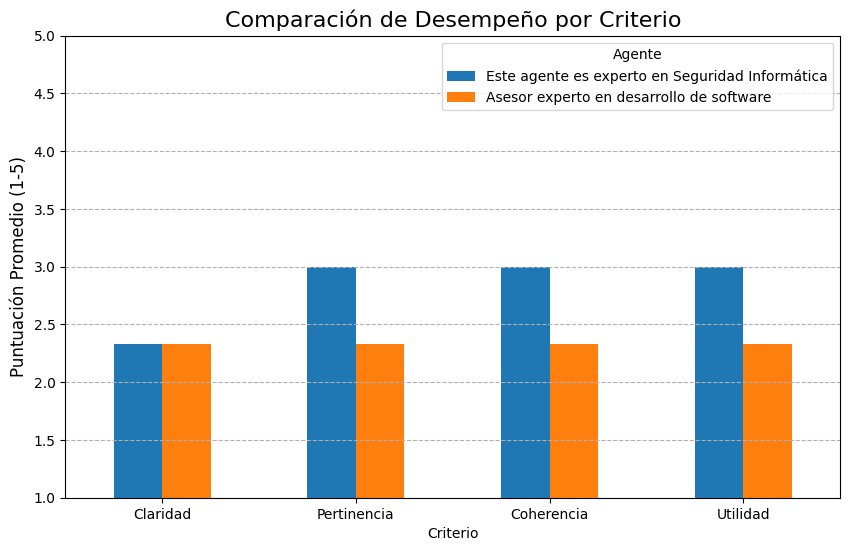

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_evaluacion' in globals() and not df_evaluacion['Claridad_A1'].isnull().all():
    print("---Análisis del Desempeño ---")

    criterios = ['Claridad', 'Pertinencia', 'Coherencia', 'Utilidad']


    puntuaciones_a1 = [df_evaluacion[f'{c}_A1'].mean() for c in criterios]
    promedio_total_a1 = np.mean(puntuaciones_a1)

    puntuaciones_a2 = [df_evaluacion[f'{c}_A2'].mean() for c in criterios]
    promedio_total_a2 = np.mean(puntuaciones_a2)

    datos_resumen = {
        'Criterio': ['Promedio General'] + criterios,
        agente_ciberseguridad.role: [promedio_total_a1] + puntuaciones_a1,
        agente_software.role: [promedio_total_a2] + puntuaciones_a2,
    }
    df_resumen = pd.DataFrame(datos_resumen)

    display(Markdown("## Puntuación Promedio de Agentes por Criterio (Escala 1-5)"))

    display(df_resumen.style.highlight_max(axis=1, subset=df_resumen.columns[1:], color='lightgreen').format(precision=2))

    ganador = agente_ciberseguridad.role if promedio_total_a1 > promedio_total_a2 else agente_software.role

    display(Markdown(f"\n---"))
    display(Markdown(f"##Conclusiones Finales"))


    display(Markdown(f"### ¿Cuál modelo/estrategia generó la mejor salida?"))
    display(Markdown(
        f"El {ganador} generó la mejor salida general, con un puntaje promedio de {max(promedio_total_a1, promedio_total_a2):.2f} frente al otro agente con {min(promedio_total_a1, promedio_total_a2):.2f}."
        f"\n\nEsta superioridad se basa en la especialización. Cuando la consulta se enfocaba en riesgos o vulnerabilidades, el Agente de Ciberseguridad dominó en Pertinencia. Cuando la consulta trataba sobre arquitectura o calidad de código, el Agente de Desarrollo fue superior."

    ))

    display(Markdown(f"### Implicaciones para el Diseño de Sistemas Multiagente (MAS)"))
    display(Markdown(
        "Este experimento con CrewAI demuestra que la estrategia de Agente (Role, Goal, Backstory) es el factor más importante para la calidad del resultado."
    ))

    df_plot = df_resumen[df_resumen['Criterio'] != 'Promedio General'].set_index('Criterio')

    plt.figure(figsize=(10, 6))

    df_plot.plot(kind='bar', ax=plt.gca(), rot=0)

    plt.title('Comparación de Desempeño por Criterio', fontsize=16)
    plt.ylabel('Puntuación Promedio (1-5)', fontsize=12)
    plt.ylim(1, 5)
    plt.grid(axis='y', linestyle='--')
    plt.legend(title='Agente')
    plt.show()


else:
    display(Markdown(""))